In [0]:
import numpy
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import pickle
import ast
import seaborn as sns
import os

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
import zipfile
root_directory = 'gdrive/My Drive/data_output/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Loads the Validation Data from P file

In [7]:

def generate_ds_from_p_file(pickle_file_path):
    with open (pickle_file_path, mode='rb') as f:
        annotated_data = pickle.load(f)
    X = np.array(list(zip(
        annotated_data['BACKLIGHT'],
        annotated_data['DARKNESS'],
        annotated_data['DIRTLENS'],
        annotated_data['MOTIONBLUR'],
        annotated_data['RAIN'],
        annotated_data['VGG_is_correct']
    )))
    print(X[0])

    return X

pickle_file = root_directory + "/TSD/p_validation_files/VALIDATION_ANNOTATED.p"
values = generate_ds_from_p_file(pickle_file)
print(values.shape)

[0 0 0 0 0 1]
(30480, 6)


# Bootsrap Intervals 

Two types 
1. Accuracy of model 
2. Bootstrap by leaf/node

In [0]:
n_iterations = 1000
n_size = int(len(values) * 0.70)

def create_bootstrap_per_class(testing_class, is_accuracy=False, graph=False):
    stats = list()
    for i in range(n_iterations):
        # prepare train and test sets
        train = resample(values, n_samples=n_size)
        test = resample(values, n_samples=3500)
        
        # fit model
        model = DecisionTreeClassifier("entropy", max_features=None,
                                       max_leaf_nodes=10,
                                       min_samples_leaf=15,
                                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=None)
        model.fit(train[:,:-1], train[:,-1])
        # evaluate model
        predictions = model.predict(test[:,:-1])
        if is_accuracy: 
            score = accuracy_score(test[:,-1], predictions)
            stats.append(score)
        else: 
            none_score = model.predict_proba([testing_class])
            stats.append(numpy.amax(none_score))
            

    #plot scores
    if graph:
        sns.distplot(stats, hist=True, kde=True,
                     bins=int(180/5), color = 'darkblue',
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'linewidth': 4})

        pyplot.show()
        #sns.show()
        
    if is_accuracy:     
        alpha = 0.95
        p = ((1.0-alpha)/2.0) * 100
        lower = max(0.0, numpy.percentile(stats, p))
        p = (alpha+((1.0-alpha)/1.0)) * 100
        upper = min(1.0, numpy.percentile(stats, p))
        print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
    else: 
        alpha = 0.95
        p = ((1.0-alpha)/2.0) * 100
        lower = max(0.0, numpy.percentile(stats, p))
        print('%.1f confidence interval %.1f%%' % (alpha*100, lower*100))
    
    return lower*100




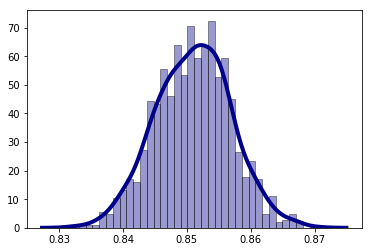

95.0 confidence interval 83.9% and 87.0%


83.94285714285714

In [13]:
create_bootstrap_per_class(None, True, True)

# Per leaf or Node

In [0]:
# # ## for all nodes and leaves 
look_up_dict = pd.read_csv(root_directory + "TSD/lookup_dict.csv")
lower_bounds_all = list()
look_up_dict['Value'] = look_up_dict['Value'].apply(ast.literal_eval)
count = 0
for row in look_up_dict['Value']:
    lower_bound = create_bootstrap_per_class(row, False, False)
    lower_bounds_all.append(lower_bound)
    count = count + 1
    print(count)
look_up_dict['lower_bounds'] = lower_bounds_all
look_up_dict.to_csv(root_directory + "TSD/confidence_intervals1.csv")

95.0 confidence interval 85.6%
1
95.0 confidence interval 84.2%
2
95.0 confidence interval 84.2%
3
95.0 confidence interval 84.2%
4
95.0 confidence interval 84.2%
5
95.0 confidence interval 84.1%
6
95.0 confidence interval 84.1%
7
95.0 confidence interval 84.1%
8
95.0 confidence interval 96.2%
9
95.0 confidence interval 89.1%
10
95.0 confidence interval 96.4%
11
95.0 confidence interval 85.6%
12
95.0 confidence interval 85.6%
13
95.0 confidence interval 93.3%
14
95.0 confidence interval 85.5%
15
95.0 confidence interval 84.8%
16
95.0 confidence interval 85.8%
17
95.0 confidence interval 84.1%
18
95.0 confidence interval 92.2%
19
95.0 confidence interval 85.8%
20
95.0 confidence interval 93.2%
21
95.0 confidence interval 92.3%
22
95.0 confidence interval 59.2%
23
95.0 confidence interval 76.3%
24
95.0 confidence interval 96.3%
25
95.0 confidence interval 52.9%
26
95.0 confidence interval 92.0%
27
95.0 confidence interval 59.3%
28
95.0 confidence interval 85.8%
29
95.0 confidence interva